Read in files

In [2]:
import os

reviews_path = "../data/Database/"

files = [ reviews_path + i for i in os.listdir(reviews_path) if i.endswith("csv")]
print(files)

['../data/Database/construction.csv', '../data/Database/computer_software.csv', '../data/Database/automotive.csv', '../data/Database/higher_ed.csv', '../data/Database/accounting.csv', '../data/Database/IT_services.csv', '../data/Database/financial.csv', '../data/Database/education_management.csv', '../data/Database/hospital_care.csv']


In [3]:
import pandas as pd

li = []

#Loading in first 2 files
for f in files[:2]:
    data = pd.read_csv(f)
    li.append(data)
    
reviews = pd.concat(li, axis=0, ignore_index=True)
print(reviews.shape)
display( reviews )

(149768, 13)


,Unnamed: 0,company_name,review_title,job_title,employee_status,location,date,review,pros,cons,rating,yes_helpful,no_helpful
0,0,Fluor Corp.,fun place to work,Principal Process Engineering Technician,Former Employee,"Sugar Land, TX",2020-02-03,"It is a 9 hour day, but if you are busy, it go...",NaN,NaN,5.0,0,0
1,1,Fluor Corp.,Im satisfied,Journeyman Pipefitter,Former Employee,"Crystal River, FL",2020-04-05,My boss are very understanding on the situatio...,NaN,NaN,5.0,0,0
2,2,Fluor Corp.,New and intellectually stimulating work.,Systems Engineer and IT Specialist,Current Employee,"Aliso Viejo, CA",2020-04-05,Great place to work with great people. The ch...,NaN,NaN,5.0,0,0
3,3,Fluor Corp.,For me.... GREAT group of people!,General Foreman - Crane and Rigging,Former Employee,"Deer Park, TX",2020-04-04,I have worked on numerous Fluor projects now. ...,Compensation was more than fair. People worked...,Time away from home.,5.0,0,0
4,4,Fluor Corp.,Good place to work in a Combat Zone,Security Specialist,Former Employee,Afghanistan,2020-04-04,I am very comfortable with the work schedule t...,NaN,NaN,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149763,49529,Cadence Design Systems,Good Company to work for,Department Lead,Former Employee,"San Jose, CA",2012-06-24,Came into the company through the back door. T...,NaN,NaN,4.0,3,0
149764,49530,Cadence Design Systems,none,Design Engineering Manager,Current Employee,IN,2019-09-15,good work life balance. Decent pay. Nice colle...,NaN,NaN,4.0,0,0
149765,49531,Cadence Design Systems,"Дружный, приятный коллектив",Менеджер по развитию бизнеса,Former Employee,Москва,2017-03-08,Офис в центре (класс А). Прекрасный коллектив....,NaN,NaN,3.0,0,1
149766,49532,Cadence Design Systems,A great company to work for,Intern,Current Employee,München,2016-02-07,A challenging internship with a lot of advanta...,NaN,NaN,5.0,0,0


Let's clean up the job titles

In [4]:
job_titles = reviews.job_title.tolist()

job_titles = list( set(job_titles) )

# Remove nan
job_titles.pop(0)

print("Total Job Titles", len(job_titles))
print(job_titles[:6])

Total Job Titles 55757
['Manager on Duty', 'Software Analyst', 'Inspection Planner / Quality Specialist', 'Nuclear power maintence', 'Turnaround Safety Specialist', 'John G, Manager']


In [5]:
import string
import re

replacement_words = {
    "it":"Technology"
    ,"sr":"Senior"
    ,"qa":"Quality"
}

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
def cleanTitle(title):
    title = title.translate(translator)
    title = re.sub(' +', ' ',title)
    title = title.lower()
    for key, value in replacement_words.items():
        title = title.replace(key,value)
    return title

clean_job_titles = list( map(cleanTitle, job_titles ) )

display( clean_job_titles[:20] )

['manager on duty',
 'software analyst',
 'inspection planner qualTechnologyy specialist',
 'nuclear power maintence',
 'turnaround safety specialist',
 'john g manager',
 'hr partner',
 'lot attendant garden associate',
 'terrTechnologyory services executive',
 'lead excavator operator',
 'business operations senior agent',
 'senior design engineer',
 'lab technician contractor',
 'international controller and senior director',
 'logistics officer in the logistic department',
 'workforce management specialist',
 'clinical sales specialist angiography and ir',
 'structural foreman safety coordinator',
 'f',
 'pmo delivery manager']

In [6]:
import spacy

nlp = spacy.load("en_core_web_md")

In [11]:
import numpy as np

X = np.zeros((len(clean_job_titles),300))

for i, title in enumerate(clean_job_titles):
    X[i] = nlp.tokenizer(title).vector


print(X.shape)

(55757, 300)


Visualize the data with PCA

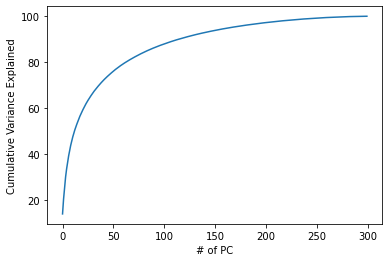

40% of variance explained by 7 principal conponents
60% of variance explained by 21 principal conponents
80% of variance explained by 63 principal conponents
95% of variance explained by 164 principal conponents
99% of variance explained by 244 principal conponents


In [12]:
import pickle
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

filename = "../models/section-2-job-titles-pca.pckl"
config = Path(filename)
if not config.is_file():
    pca = PCA(n_components=X.shape[1])
    pca_data = pca.fit(X)
    pickle.dump(pca, open(filename, 'wb'))
else:
    pca = pickle.load(open(filename, 'rb'))

pca_data = pca.transform(X)

# pca_expl_var = pca.explained_variance_ratio_
pca_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4 ) * 100 )
plt.plot(pca_sum)
plt.xlabel('# of PC')
plt.ylabel('Cumulative Variance Explained')
plt.show()

print( "40% of variance explained by {0} principal conponents".format(sum(pca_sum <= 40)) )
print( "60% of variance explained by {0} principal conponents".format(sum(pca_sum <= 60)) )
print( "80% of variance explained by {0} principal conponents".format(sum(pca_sum <= 80)) )
print( "95% of variance explained by {0} principal conponents".format(sum(pca_sum <= 95)) )
print( "99% of variance explained by {0} principal conponents".format(sum(pca_sum <= 99)) )

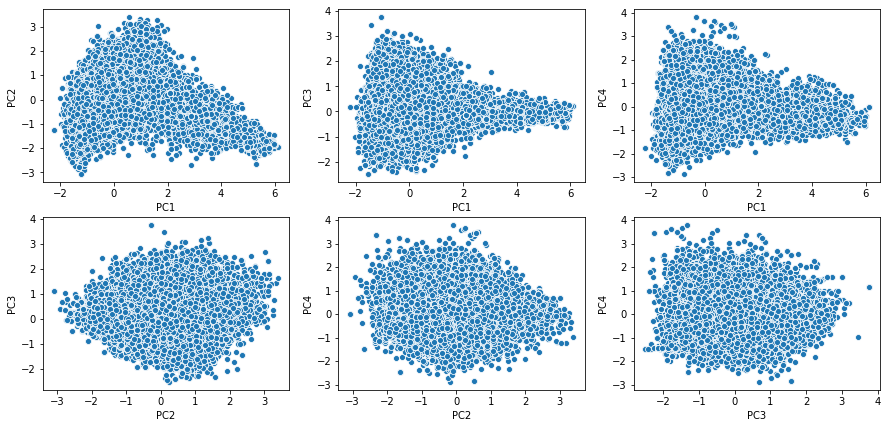

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


df_pca_top_ten = pd.DataFrame(pca_data[:,:10])
df_pca_top_ten.columns = ['PC1','PC2', 'PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9','PC10']

fig, ax =plt.subplots(2,3,figsize=(15,7))
pc1_pc2 = sns.scatterplot(x="PC1", y="PC2", data=df_pca_top_ten, ax=ax[0,0])
pc1_pc3 = sns.scatterplot(x="PC1", y="PC3", data=df_pca_top_ten, ax=ax[0,1])
pc1_pc4 = sns.scatterplot(x="PC1", y="PC4", data=df_pca_top_ten, ax=ax[0,2])
pc2_pc3 = sns.scatterplot(x="PC2", y="PC3", data=df_pca_top_ten, ax=ax[1,0])
pc2_pc4 = sns.scatterplot(x="PC2", y="PC4", data=df_pca_top_ten, ax=ax[1,1])
pc3_pc4 = sns.scatterplot(x="PC3", y="PC4", data=df_pca_top_ten, ax=ax[1,2])

What the heck are we looking at?  Let's try to cluster it

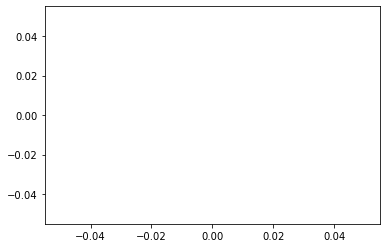

In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,20)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=76244)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans_model.cluster_centers_, "euclidean"), axis=1)) / X.shape[0])

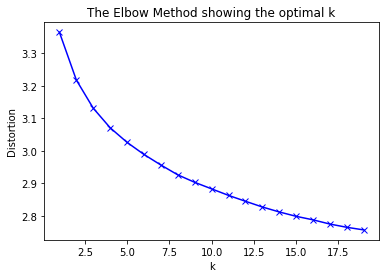

In [17]:
import matplotlib.pyplot as plt

plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal k")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

k=8
kmeans_model = KMeans(n_clusters=k, random_state=76244)
labels = kmeans_model.fit_predict(X)

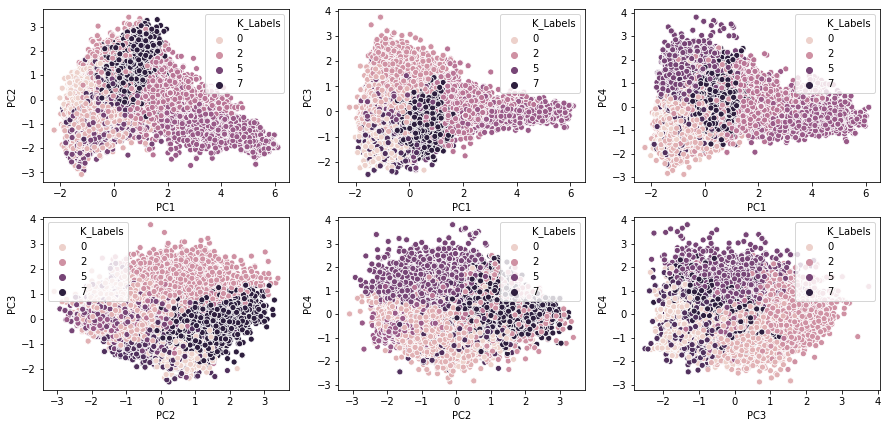

In [19]:
df_pca_top_ten["K_Labels"] = labels

fig, ax =plt.subplots(2,3,figsize=(15,7))
pc1_pc2 = sns.scatterplot(x="PC1", y="PC2", hue="K_Labels", data=df_pca_top_ten, ax=ax[0,0])
pc1_pc3 = sns.scatterplot(x="PC1", y="PC3", hue="K_Labels", data=df_pca_top_ten, ax=ax[0,1])
pc1_pc4 = sns.scatterplot(x="PC1", y="PC4", hue="K_Labels", data=df_pca_top_ten, ax=ax[0,2])
pc2_pc3 = sns.scatterplot(x="PC2", y="PC3", hue="K_Labels", data=df_pca_top_ten, ax=ax[1,0])
pc2_pc4 = sns.scatterplot(x="PC2", y="PC4", hue="K_Labels", data=df_pca_top_ten, ax=ax[1,1])
pc3_pc4 = sns.scatterplot(x="PC3", y="PC4", hue="K_Labels", data=df_pca_top_ten, ax=ax[1,2])